In [1]:
import arima_model_master as arm
import data_getter as data_con
import importlib
import pandas as pd

importlib.reload(arm)

targets = ['MedianIncome', 'MedianHousePrice', 'AverageRate','AveragePoints','NewBuildings','NewUnits']
target = 'MedianIncome'
age_range = '25-44'
target_fips = '34003'



In [2]:
all_df = data_con.run_queries()
master_table = data_con.join_tables(all_df)

23
35
56
1631


In [ ]:
#assert 1 == 2 # Don't run this one if we don't need to (90 minute run time)
prediction_dataframes = []
age_ranges = master_table.AgeGroup.unique().tolist()
age_ranges = [_ for _ in age_ranges if str(_) != 'nan']
all_fips = master_table.FIPS.unique().tolist()
total = len(all_fips) * len(age_ranges)

cntr = 0
for i, age_range in enumerate(age_ranges):
    for ii, target_fips in enumerate(all_fips):
        params = [target_fips, age_range]
        target = 'MedianIncome'
        try:
            graph_ready, export_ready = arm.dispatcher(master_table, target, params)
        except Exception as E:
            print(f'Failure: {E}, params: {params}')
            cntr += 1
            continue
        export_ready['AgeGroup'] = age_range
        prediction_dataframes.append(export_ready)
        cntr += 1
        print(f'{cntr} of {total} completed')

In [ ]:
prediction_dataframes = []
all_fips = master_table.FIPS.unique().tolist()
total = len(all_fips)

cntr = 0
for i, target_fips in enumerate(all_fips):
    params = [target_fips]
    target = 'MedianHousePrice'
    try:
        graph_ready, export_ready = arm.dispatcher(master_table, target, params)
    except Exception as E:
        print(f'Failure: {E}, params: {params}')
        cntr += 1
        continue
    prediction_dataframes.append(export_ready)
    cntr += 1
    print(f'{cntr} of {total} completed')

In [ ]:
target = 'MedianHousePrice'
arm.graph_final_results(graph_ready, target)

In [ ]:
export_ready

In [ ]:

main_df = pd.DataFrame()

for df in prediction_dataframes:
    main_df = pd.concat([main_df,df])
    
main_df

In [ ]:
main_df.tail(50)

In [ ]:
main_df.to_csv("PredictedHousePrices.csv", index = False)

In [ ]:
starter = main_df.shape[0]
print(starter * .15)

In [1]:
import joblib

In [43]:
prediction_dataframes = []
age_ranges = master_table.AgeGroup.unique().tolist()
age_ranges = [_ for _ in age_ranges if str(_) != 'nan']
all_fips = master_table.FIPS.unique().tolist()
total = len(all_fips) * len(age_ranges)
params = [target_fips, age_range]
target = 'MedianIncome'
    
graph_ready, export_ready = arm.dispatcher(master_table, target, params)

Column: MedianIncome | ADF Statistic: 4.140170176639361 | P-Value: 1.0
Column: diff_1 | ADF Statistic: 0.9126391187009933 | P-Value: 0.9932530731907094
Column: diff_2 | ADF Statistic: -4.891766908288081 | P-Value: 3.6184340862273524e-05
(15, 6)
ARIMA(0, 0, 0) RMSE=7153.792
ARIMA(0, 0, 1) RMSE=6372.322
Input contains NaN, infinity or a value too large for dtype('float64').
Input contains NaN, infinity or a value too large for dtype('float64').
Input contains NaN, infinity or a value too large for dtype('float64').
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
ARIMA(2, 0, 0) RMSE=6067.546
ARIMA(2, 0, 1) RMSE=5446.652
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
ARIMA(3, 0, 0) RMSE=4214.180
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
LU decomposition error.
LU decomposition error.
Schur 

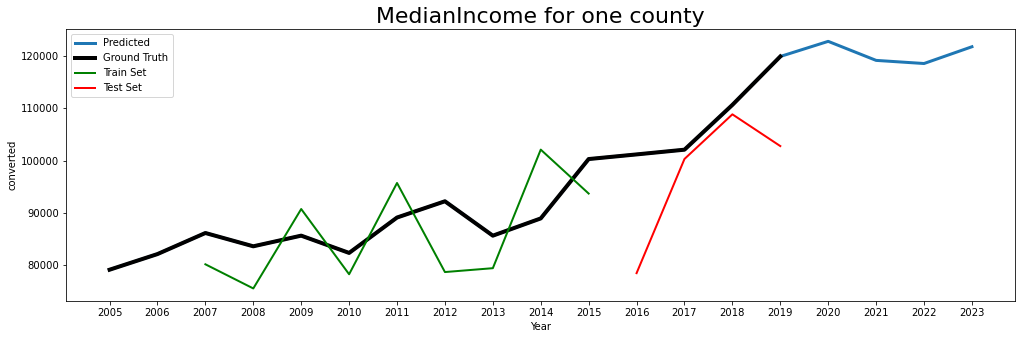

In [44]:
arm.graph_final_results(graph_ready, target)

In [5]:
#Docs = https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

target_fips = '34005'
params = [target_fips, age_range]
params = [target_fips]
target = 'MedianHousePrice'

In [6]:
adf_test = ADFTest(alpha=0.05)
filtered_data = arm.filter_data(master_table, target, params)
adf_test.should_diff(filtered_data[target])

ValueError: Wrong number of items passed 4, placement implies 1

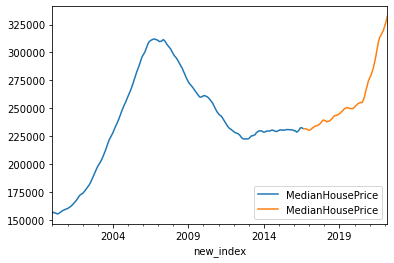

 ARIMA(0,1,0)(0,1,0)[4]             : AIC=3210.793, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=3208.032, Time=0.04 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=3210.569, Time=0.07 sec
 ARIMA(0,1,0)(0,1,3)[4]             : AIC=3212.943, Time=0.09 sec
 ARIMA(0,1,0)(0,1,4)[4]             : AIC=3216.049, Time=0.16 sec
 ARIMA(0,1,0)(0,1,5)[4]             : AIC=3219.523, Time=0.35 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=3208.027, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=3209.925, Time=0.09 sec
 ARIMA(0,1,0)(1,1,2)[4]             : AIC=3212.221, Time=0.08 sec
 ARIMA(0,1,0)(1,1,3)[4]             : AIC=3214.360, Time=0.12 sec
 ARIMA(0,1,0)(1,1,4)[4]             : AIC=3216.925, Time=0.39 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=3209.970, Time=0.09 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=3211.927, Time=0.06 sec
 ARIMA(0,1,0)(2,1,2)[4]             : AIC=3213.595, Time=0.45 sec
 ARIMA(0,1,0)(2,1,3)[4]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(3

In [137]:
#filtered_data.index = filtered_data.index.astype('str')

from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(filtered_data[[target]].dropna(), train_size = .75, shuffle = False)

fig, ax = plt.subplots()

y_train.plot(ax=ax)
y_test.plot(ax=ax)
plt.show()

arima_model = auto_arima(
    #Data
    y_train, 
    #NonSeasonalComponents
    start_p=0, start_q=0, d=1, max_p=5, max_d=5, max_q=5, 
    #SeasonalComponents
    start_P=0, D=1, start_Q=0, max_P=5, max_D=5,
    max_Q=5, m=4, seasonal=True, trace=True, stepwise=False, n_fits = 100)

prediction = pd.DataFrame(arima_model.predict(n_periods=y_test.shape[0]), index = y_test.index)
prediction.columns = [target+"_Prediction"]


# y_train = y_train.reset_index()
# y_train.drop(columns = ['new_index'], inplace = True)
# new_df = pd.concat([y_train,prediction])
# new_df = new_df.reset_index(drop = True)

In [142]:
import seaborn as sns

TypeError: Invalid object type at position 0

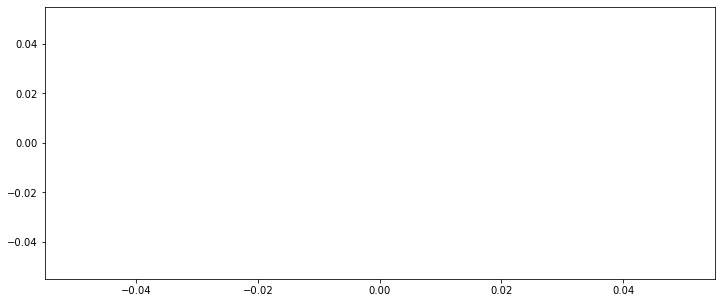

In [145]:
fig, ax = plt.subplots(figsize = (12,5))
# y_train.plot(ax=ax)
# y_test.plot(ax=ax)
#new_df.plot(ax=ax)
ax = sns.lineplot(x = y_train.index, y = y_train.MedianHousePrice)
ax = sns.lineplot(x = y_test.index, y = y_test.MedianHousePrice)
ax = sns.lineplot(x = prediction.index, y = prediction.MedianHousePrice_Prediction)
# y_train.plot(ax = ax)
# y_test.plot(ax = ax)
# prediction.plot(ax = ax)
plt.show()

In [ ]:
#Docs = https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

# Get your data into the state it needs to be in
filtered_data = ?

adf_test.should_diff(filtered_data['MedianIncome'])

#filtered_data.index = filtered_data.index.astype('str')

from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(filtered_data['MedianIncome'].dropna(), train_size = .75, shuffle = False)

# This plotting method was necessary because my data was indexed by time period
fig, ax = plt.subplots()
y_train.plot(ax=ax)
y_test.plot(ax=ax)
plt.show()

arima_model = auto_arima(
    #Data
    y_train, 
    #NonSeasonalComponents
    start_p=0, start_q=0, d=1, max_p=5, max_d=5, max_q=5, 
    #SeasonalComponents
    start_P=0, D=1, start_Q=0, max_P=5, max_D=5,
    max_Q=5, m=1, seasonal=False, trace=True, stepwise=False, n_fits = 100)

prediction = pd.DataFrame(arima_model.predict(n_periods=20, index = y_test.index))
prediction.columns = ['Predictions']
plt.plot(prediction)